## FRAUD DETECTION IN PAYMENT GATEWAY

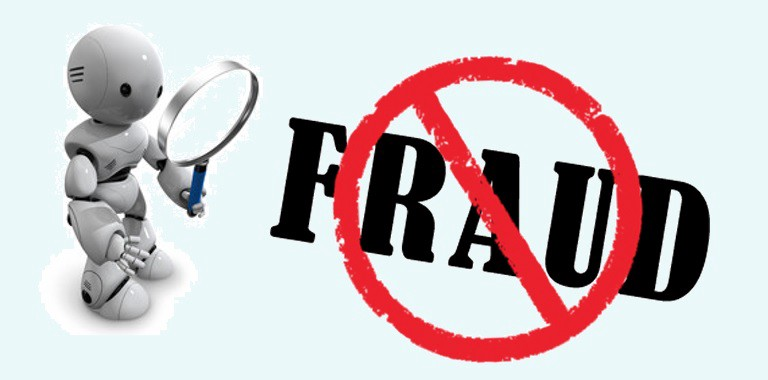

### Importing Libraries

In [89]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings("ignore")
import pickle
import joblib

In [2]:
df=pd.read_csv("C:\\Users\\Darshu\\Downloads\\Fraud Detection.csv")
print("Dataset with rows{} and columns{}".format(df.shape[0],df.shape[1]))
df.head()

Dataset with rows76529 and columns11


,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [4]:
df.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529.000000,76529.000000,76529.000000,76529.000000
mean,6.940200e+14,1.247483e+07,58497.189105,132.724348,2.255707,0.002012
std,7.867885e+14,1.205878e+07,36740.216787,2350.110900,0.732174,0.044814
min,8.000000e+00,1.000000e+00,7889.000000,-20000.000000,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,23667.000000,-1.000000,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,47334.000000,20.000000,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,78890.000000,52.000000,2.000000,0.000000
max,2.784238e+15,5.592048e+07,213003.000000,197217.760000,4.000000,1.000000


In [5]:
df.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

## Univariate Analysis

In [6]:
df.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529.000000,76529.000000,76529.000000,76529.000000
mean,6.940200e+14,1.247483e+07,58497.189105,132.724348,2.255707,0.002012
std,7.867885e+14,1.205878e+07,36740.216787,2350.110900,0.732174,0.044814
min,8.000000e+00,1.000000e+00,7889.000000,-20000.000000,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,23667.000000,-1.000000,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,47334.000000,20.000000,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,78890.000000,52.000000,2.000000,0.000000
max,2.784238e+15,5.592048e+07,213003.000000,197217.760000,4.000000,1.000000


In [7]:
df.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [8]:
# Understanding all columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

payment_method
['sbi_atm_cum_debit_card' 'e_wallet_payments' 'other_debit_cards'
 'visa_master_debit_cards' 'visa_master_credit_cards'
 'unified_payments_interface']
partner_category
['cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5' 'cat_6' 'cat_7' 'cat_8' 'cat_9']
country
['IND_INR']
device_type
['android_devices' 'other_pcs' 'windows_pcs' 'ios_devices']
transaction_initiation
['2016-11-15 19:16:12+00:00' '2017-01-11 09:25:33+00:00'
 '2016-12-07 07:58:09+00:00' ... '2016-12-26 21:47:08+00:00'
 '2016-12-11 13:44:06+00:00' '2017-01-11 19:08:18+00:00']


In [9]:
print(df["device_type"].value_counts())
print("\n",df["is_fraud"].value_counts())
print("\n",df["payment_method"].value_counts())

other_pcs          45560
android_devices    29662
ios_devices          876
windows_pcs          431
Name: device_type, dtype: int64

 0    76375
1      154
Name: is_fraud, dtype: int64

 sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64


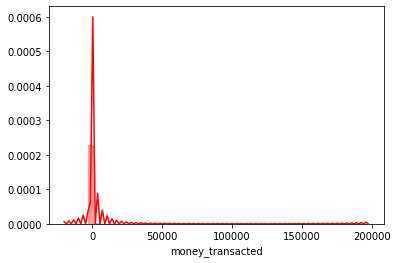

In [10]:
sns.distplot(df['money_transacted'],color="red")

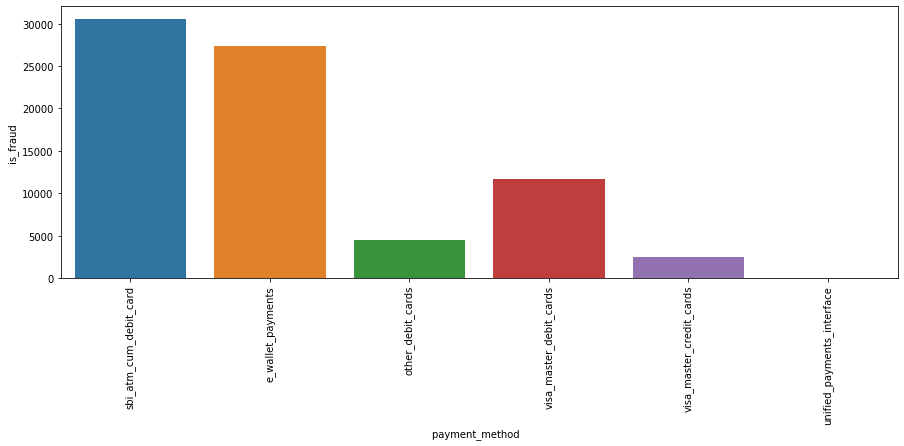

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['payment_method'])
plt1.set(xlabel = 'payment_method  ', ylabel= 'is_fraud')
xticks(rotation=90)
plt.show()
plt.tight_layout()

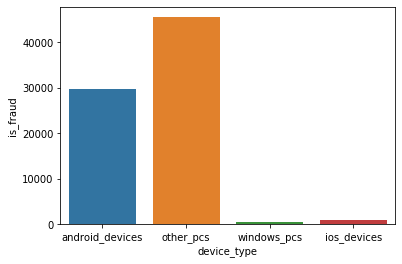

<Figure size 432x288 with 0 Axes>

In [12]:
plt1 = sns.countplot(df['device_type'])
plt1.set(xlabel = 'device_type', ylabel= 'is_fraud')
plt.show()
plt.tight_layout()

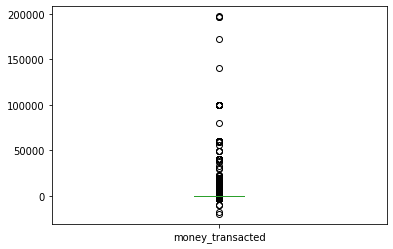

In [13]:
# Box plot for pdays (without considering -1 values)
df.money_transacted.plot.box()
plt.show()

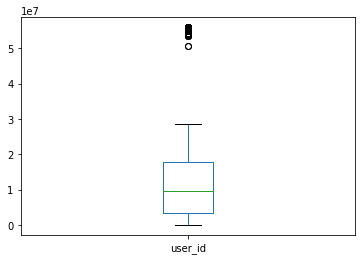

In [14]:
## boxplot for user_id
df.user_id.plot.box()
plt.show()

In [15]:
#df['transaction_initiation']=pd.to_numeric(df['transaction_initiation'],errors='coerce')

In [16]:
# droping the transaction initiation column
df=df.drop(['transaction_initiation'],axis=1)

## Bi- variate Analysis

In [17]:
df.groupby("is_fraud").count()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category
is_fraud,,,,,,,,,
0,76375,76375,76375,76375,76375,76375,76375,76375,76375
1,154,154,154,154,154,154,154,154,154


In [18]:
numeric = []
categorical = []
for col in df.columns:
    if df[col].dtype=='O':
        categorical.append(col)
    else:
        numeric.append(col)

In [19]:
print("Object data type features ",categorical)
print("Numerical data type features ",numeric)

Object data type features  ['payment_method', 'partner_category', 'country', 'device_type']
Numerical data type features  ['transaction_number', 'user_id', 'partner_id', 'money_transacted', 'partner_pricing_category', 'is_fraud']


In [20]:
df.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'partner_pricing_category', 'is_fraud'],
      dtype='object')

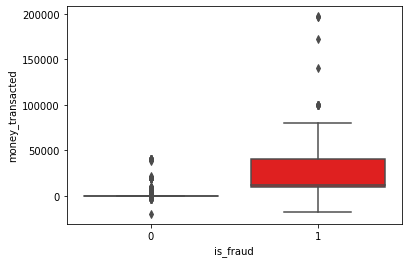

In [21]:
# Box plot for money trans
sns.boxplot(data=df,x='is_fraud',y='money_transacted',color='red')
plt.show()

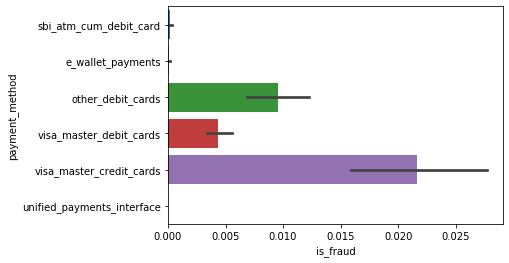

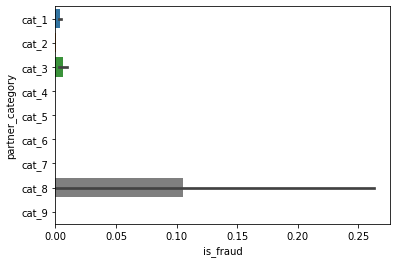

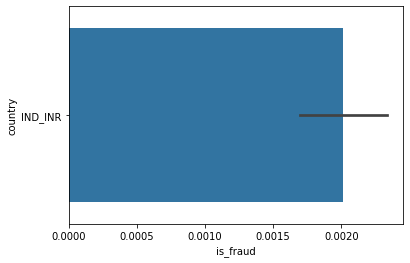

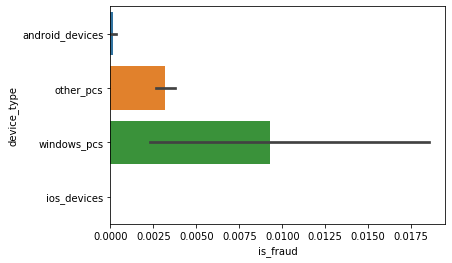

In [22]:
# this picture clearley shows which holds highest farud trasaction in all segments
for i in df[categorical]:
    sns.barplot(df.is_fraud,df[i])
    plt.show()

## Money transacted - distribution , credited, debited

AxesSubplot(0.125,0.125;0.775x0.755)


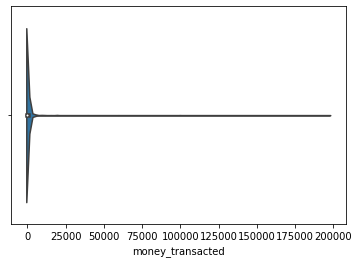

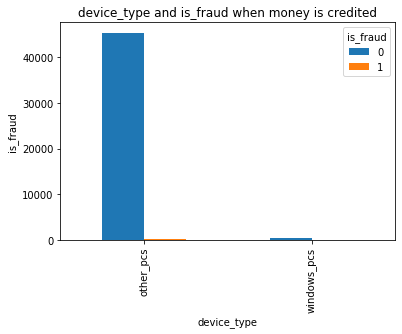

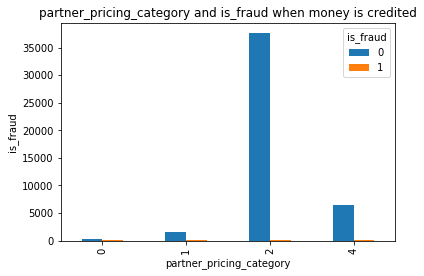

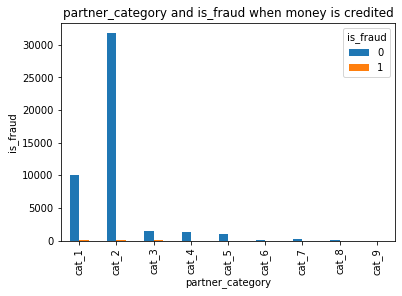

In [23]:
df_positive = df[df.money_transacted >= 0]

print(sns.violinplot(df_positive.money_transacted))


pd.crosstab(df_positive.device_type,df_positive.is_fraud).plot(kind='bar')
plt.title('device_type and is_fraud when money is credited')
plt.xlabel('device_type')
plt.ylabel('is_fraud')
plt.show()

pd.crosstab(df_positive.partner_pricing_category,df_positive.is_fraud).plot(kind='bar')
plt.title('partner_pricing_category and is_fraud when money is credited')
plt.xlabel('partner_pricing_category')
plt.ylabel('is_fraud')
plt.show()

pd.crosstab(df_positive.partner_category,df_positive.is_fraud).plot(kind='bar')
plt.title('partner_category and is_fraud when money is credited')
plt.xlabel('partner_category')
plt.ylabel('is_fraud')
plt.show()

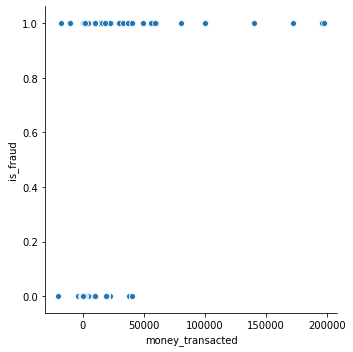

In [24]:
sns.relplot(x='money_transacted',y='is_fraud',data=df)

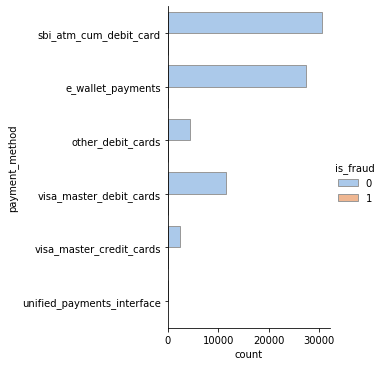

In [25]:
sns.catplot(y='payment_method',hue='is_fraud',kind='count',palette='pastel',edgecolor='.6',data=df)

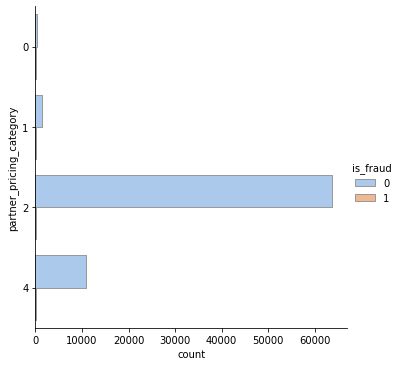

In [26]:
sns.catplot(y='partner_pricing_category',hue='is_fraud',kind='count',palette='pastel',edgecolor='.6',data=df)

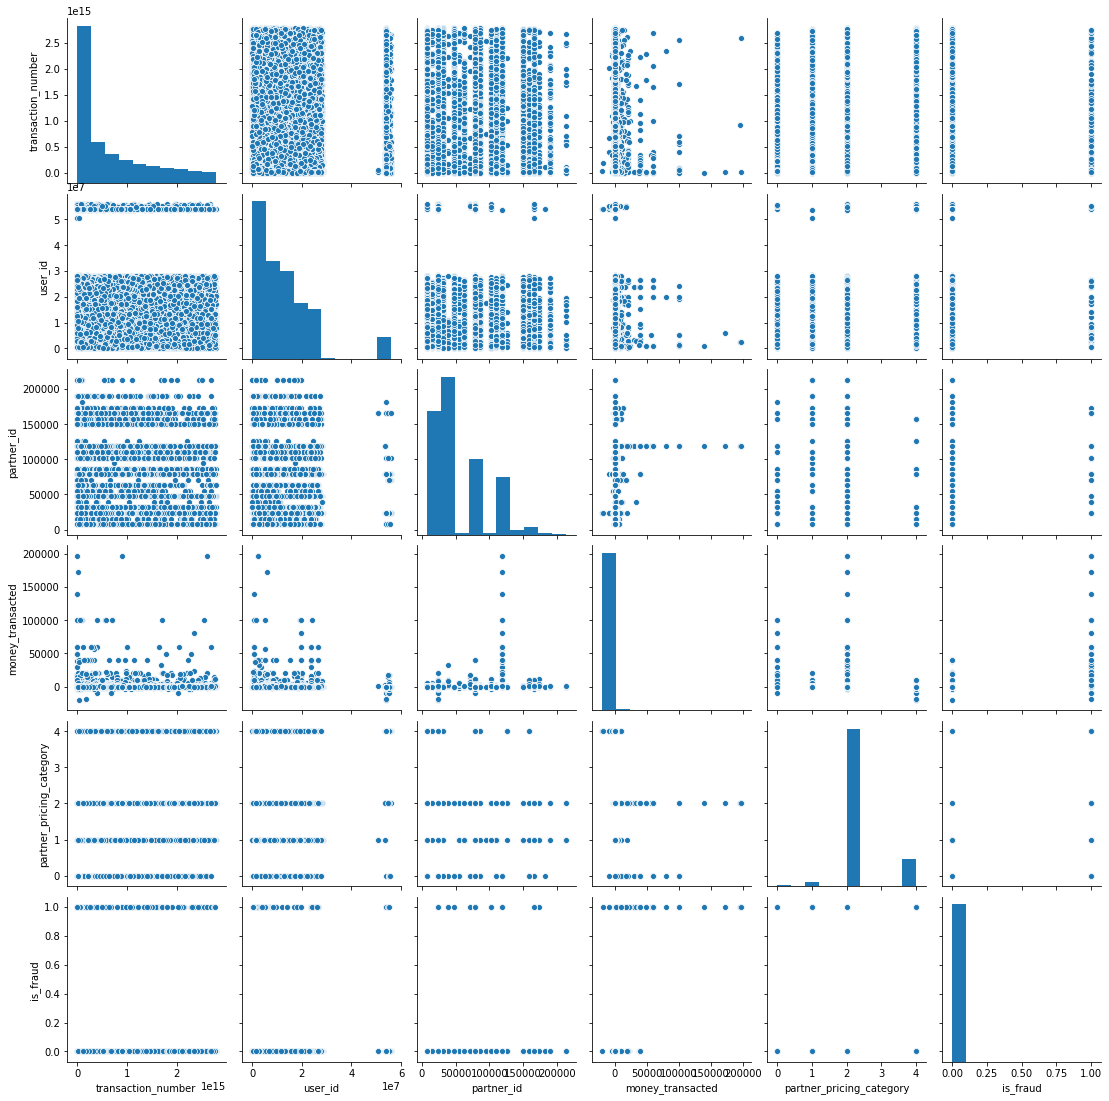

In [27]:
sns.pairplot(df)

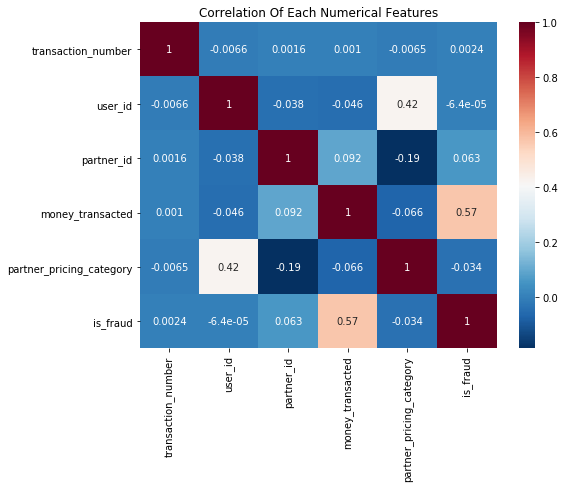

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

## Label Encoding of Categorical Variables

In [29]:
# importing labelencoder
from sklearn.preprocessing import LabelEncoder

In [30]:
df1 = df[categorical].apply(LabelEncoder().fit_transform)
df1

,payment_method,partner_category,country,device_type
0,2,0,0,0
1,0,1,0,2
2,0,1,0,2
3,1,2,0,2
4,1,0,0,2
...,...,...,...,...
76524,2,0,0,0
76525,5,0,0,2
76526,2,0,0,0
76527,2,0,0,0


In [31]:
# after label encoding of categorical column joining with numeric column
f_data = df1.join(df[numeric])
f_data

,payment_method,partner_category,country,device_type,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
0,2,0,0,0,144703125000,17539344,47334,-5.0,2,0
1,0,1,0,2,77406814453032,24710841,78890,100.0,2,0
2,0,1,0,2,308929485482801,24265476,78890,50.0,2,0
3,1,2,0,2,665270027747073,10240000,102557,1000.0,2,0
4,1,0,0,2,38276160171101,5880625,118335,200.0,2,0
...,...,...,...,...,...,...,...,...,...,...
76524,2,0,0,0,179759462245453,19686969,47334,-100.0,2,0
76525,5,0,0,2,2693567760244353,11662225,118335,200.0,2,0
76526,2,0,0,0,119750257089000,374544,47334,-3.5,2,0
76527,2,0,0,0,1949798765017089,1687401,47334,-20.0,2,0


In [32]:
f_data.head()

,payment_method,partner_category,country,device_type,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
0,2,0,0,0,144703125000,17539344,47334,-5.0,2,0
1,0,1,0,2,77406814453032,24710841,78890,100.0,2,0
2,0,1,0,2,308929485482801,24265476,78890,50.0,2,0
3,1,2,0,2,665270027747073,10240000,102557,1000.0,2,0
4,1,0,0,2,38276160171101,5880625,118335,200.0,2,0


In [33]:
f_data.shape

(76529, 10)

In [34]:
f_data.columns

Index(['payment_method', 'partner_category', 'country', 'device_type',
       'transaction_number', 'user_id', 'partner_id', 'money_transacted',
       'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [95]:
f_data1=f_data.drop(['country','transaction_number','user_id'],axis=1)

## Logistic Regression 

In [96]:
X = f_data1.drop("is_fraud", axis=1)
print(X.shape)
X.head()

(76529, 6)


,payment_method,partner_category,device_type,partner_id,money_transacted,partner_pricing_category
0,2,0,0,47334,-5.0,2
1,0,1,2,78890,100.0,2
2,0,1,2,78890,50.0,2
3,1,2,2,102557,1000.0,2
4,1,0,2,118335,200.0,2


In [98]:
y= f_data1[['is_fraud']]
print(y.shape)
y.head()

(76529, 1)


,is_fraud
0,0
1,0
2,0
3,0
4,0


In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=143)

In [100]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X_train,y_train)

y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)


print(y_train_pred)
print(y_test_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [101]:
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15272
           1       0.59      0.29      0.39        34

    accuracy                           1.00     15306
   macro avg       0.79      0.65      0.70     15306
weighted avg       1.00      1.00      1.00     15306



From logistic regression we not get good result so moving to another ensemble classifer that works realy well for this kind of data....

## Predictive model : RandomForest 

In [103]:
# impoting random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5,random_state=143,max_leaf_nodes=50)

##  Splitting into Train and Test

In [136]:
X = f_data1.drop("is_fraud", axis=1)
print(X.shape)
X.head()

(76529, 6)


,payment_method,partner_category,device_type,partner_id,money_transacted,partner_pricing_category
0,2,0,0,47334,-5.0,2
1,0,1,2,78890,100.0,2
2,0,1,2,78890,50.0,2
3,1,2,2,102557,1000.0,2
4,1,0,2,118335,200.0,2


In [137]:
y= f_data1[['is_fraud']]
print(y.shape)
y.head()

(76529, 1)


,is_fraud
0,0
1,0
2,0
3,0
4,0


In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=143)

In [140]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=143,
                       verbose=0, warm_start=False)

In [141]:
## importing metrics
from sklearn. model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [142]:
# cross validation score
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.9993956516931017

In [143]:
## predicting x_train and y_tarin
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [144]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15272
           1       0.90      0.79      0.84        34

    accuracy                           1.00     15306
   macro avg       0.95      0.90      0.92     15306
weighted avg       1.00      1.00      1.00     15306



In [145]:
# f1_score
f1_score(y_test,y_test_pred)

0.84375

In [147]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [148]:
## finding 
#validating on train
print('recall_score for train',recall_score(y_train,y_train_pred))
print('precision_score for train',precision_score(y_train,y_train_pred))
print('f1_score for train',f1_score(y_train,y_train_pred))

# validate on test
print('recall_score for test',recall_score(y_test,y_test_pred))
print('precision_score for test',precision_score(y_test,y_test_pred))
print('f1_score for test',f1_score(y_test,y_test_pred))

recall_score for train 0.825
precision_score for train 0.9801980198019802
f1_score for train 0.8959276018099547
recall_score for test 0.7941176470588235
precision_score for test 0.9
f1_score for test 0.84375


In [149]:
#Random GRID SEARCH
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

grid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs = -1),
                            param_grid = {'n_estimators' : [20,30,50,70],
                                         'max_depth' : [2,3,4,5,6,7,8,9,10],
                                         'max_features' : [2,3,4,5,6,7]
                                         },
                           cv = 5,
                           scoring = make_scorer(recall_score),
                           n_jobs=-1
                        )

grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [150]:
rfc_params = grid_search.best_params_
print(rfc_params)

rfc_model = RandomForestClassifier()

rfc_model.set_params(**rfc_params)
rfc_model.fit(X_train,y_train)

y_train_pred = rfc_model.predict(X_train)
y_test_pred = rfc_model.predict(X_test)


#### VALIDATION #######

#validating on train
print('recall_score for train',recall_score(y_train,y_train_pred))
print('precision_score for train',precision_score(y_train,y_train_pred))
print('f1_score for train',f1_score(y_train,y_train_pred))

# validate on test
print('recall_score for test',recall_score(y_test,y_test_pred))
print('precision_score for test',precision_score(y_test,y_test_pred))
print('f1_score for test',f1_score(y_test,y_test_pred))

{'max_depth': 2, 'max_features': 5, 'n_estimators': 70}
recall_score for train 0.9083333333333333
precision_score for train 0.7266666666666667
f1_score for train 0.8074074074074075
recall_score for test 0.8529411764705882
precision_score for test 0.7631578947368421
f1_score for test 0.8055555555555555


In [151]:
# recall value for train dataset
print(recall_score(y_train,y_train_pred))

0.9083333333333333


In [152]:
# recall value for test dataset
print(recall_score(y_test,y_test_pred))

0.8529411764705882


In [153]:
confusion_matrix(y_test,y_test_pred)

array([[15263,     9],
       [    5,    29]], dtype=int64)

In [154]:
def RF_matric():    
    print('Report:\n',classification_report(y_test, y_test_pred))
    print("F1 Score:",f1_score(y_test_pred,y_test))
    print('confusion Matrix:\n',confusion_matrix(y_test_pred,y_test))
    print('cross validation:',cross_val_score(rfc, X, y, cv=5))

In [155]:
RF_matric()

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15272
           1       0.76      0.85      0.81        34

    accuracy                           1.00     15306
   macro avg       0.88      0.93      0.90     15306
weighted avg       1.00      1.00      1.00     15306

F1 Score: 0.8055555555555555
confusion Matrix:
 [[15263     5]
 [    9    29]]
cross validation: [0.999412   0.99934666 0.99915066 0.99947733 0.99928128]


In [156]:
# importing roc_curve, auc
from sklearn.metrics import roc_auc_score

In [157]:
# testing roc_auc_score
roc_auc_score(y_test,y_test_pred)

0.9261759313468708

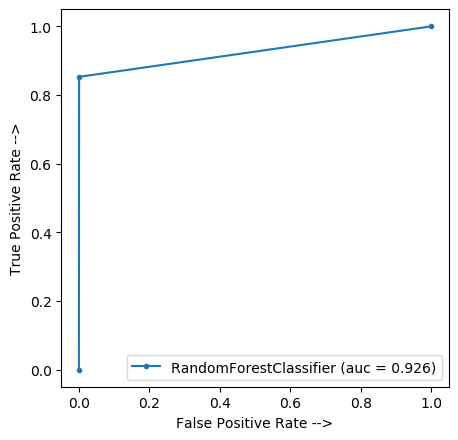

In [158]:
# plotting roc curve
from sklearn.metrics import roc_curve, auc

RandomForestClassifier_fpr, RandomForestClassifier_tpr, threshold = roc_curve(y_test, y_test_pred)
auc_logistic = auc(RandomForestClassifier_fpr, RandomForestClassifier_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(RandomForestClassifier_fpr, RandomForestClassifier_tpr, marker='.', label='RandomForestClassifier (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')


plt.legend()

plt.show()

In [159]:
#selecting important feature
feats = {}
for feature, importance in zip(X_train.columns, rfc.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient="index").rename(
    columns={0: "Gini-importance"}
)
imp = importances.sort_values(by="Gini-importance", ascending=False)[:20]

Index(['money_transacted', 'partner_pricing_category', 'partner_id',
       'payment_method', 'partner_category', 'device_type'],
      dtype='object')


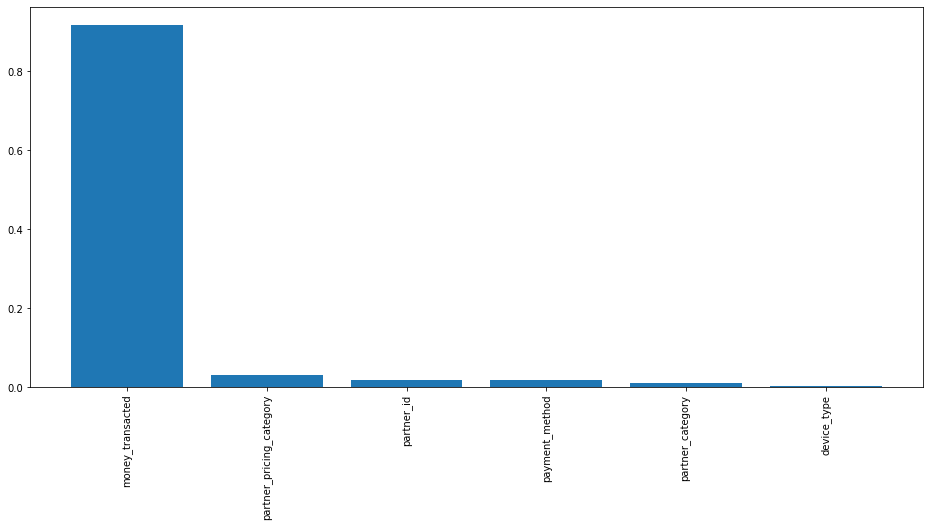

In [160]:
# finding important independent variable
plt.figure(1, figsize=(16, 7))
plt.bar(imp.index, imp["Gini-importance"])
plt.xticks(imp.index, rotation=90)
print(imp.index)

In [161]:
from sklearn.model_selection import TimeSeriesSplit, KFold

n_folds = 5
folds = TimeSeriesSplit(n_splits=n_folds)
folds = KFold(n_splits=5)

In [162]:
columns = X_train.columns

splits = folds.split(X_train, y_train)

y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_train.shape[0])

score_auc = 0

feature_importances = pd.DataFrame()
feature_importances["feature"] = columns

In [163]:
params = {
    "num_leaves": 64,
    "min_child_weight": 0.03,
    "feature_fraction": 0.04,
    "bagging_fraction": 0.33,
    "min_data_in_leaf": 80,
    "objective": "binary",
    "max_depth": -1,
    "learning_rate": 0.006,
    "boosting_type": "gbdt",
    "bagging_seed": 7,
    "metric": "auc",
    "verbosity": -1,
    "reg_alpha": 0.3,
    "reg_lambda": 0.6,
    "random_state": 0,
}

In [164]:
%pip install lightgbm
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [165]:
import lightgbm as lgb

In [166]:
%%time
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_tr, X_val = X_train[columns].iloc[train_index], X_train[columns].iloc[valid_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_tr, label=y_tr)
    dvalid = lgb.Dataset(X_val, label=y_val)

    clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=200, early_stopping_rounds=100)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_val = clf.predict(X_val)
    y_oof[valid_index] = y_pred_val
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_val, y_pred_val)}")
    
    score_auc += roc_auc_score(y_val, y_pred_val) / n_folds
    
    y_preds += clf.predict(X_test) / n_folds
    
    del X_tr, X_val, y_tr, y_val

Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.990515	valid_1's auc: 0.998454
Early stopping, best iteration is:
[108]	training's auc: 0.992787	valid_1's auc: 0.998568
Fold 1 | AUC: 0.9985681557846506
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.987949	valid_1's auc: 0.994642
Fold 2 | AUC: 0.9946415711947627
Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.989382	valid_1's auc: 0.999722
Early stopping, best iteration is:
[171]	training's auc: 0.988545	valid_1's auc: 0.999722
Fold 3 | AUC: 0.9997216537044616
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	training's auc: 0.994895	valid_1's auc: 0.969696
Fold 4 | AUC: 0.9696960842751565
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.987692	valid_1's auc: 0.993001
Fold

In [167]:
print(f"\nMean AUC = {score_auc}")
print(f"Out of folds AUC = {roc_auc_score(y_train, y_oof)}")


Mean AUC = 0.9911257119389123
Out of folds AUC = 0.983134829713762


## XGBOOST 

In [168]:
# importing xgboost
import xgboost as xgb
from xgboost import XGBClassifier
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:hinge", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                base_score=0.5, random_state=42)

XGBoost_CLF.fit(X_train,y_train)

y_pred = XGBoost_CLF.predict(X_test)

print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))
print("Confusion Matrix of XGBoost: \n", confusion_matrix(y_test,y_pred))

Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15272
           1       0.93      0.82      0.87        34

    accuracy                           1.00     15306
   macro avg       0.97      0.91      0.94     15306
weighted avg       1.00      1.00      1.00     15306

Confusion Matrix of XGBoost: 
 [[15270     2]
 [    6    28]]


finally after building this model it is easy to detect and prevent fraudulent transactions in payment gateway

Top 3 Important features for fraudulent transactions are
1.Money_transcated has higher fraud percentage compared to other features.
2.Category 8> Category 3> Category 1 partner category had higher fraud percentage.
3.Visa master credit card> visa master debit card> other debit cards payment method had higher fraud percentage.
4.Windows Pc and other Pcs has more fraud percentage.

### From the model When we use the xgboost we got an F1_Score of 0.87 consider to be better when compared to  other  algorithms

In [171]:
file=open('random.pkl','wb')
joblib.dump(rfc,file,compress=3)
file.close()